In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('/kaggle/input/osteoporosis-tabular-data/preprocessed_osteoporosis_data.csv')

In [4]:
df.head()

,Patient Id,Gender,Age,height (meter),Weight (KG),BMI:,Smoker,Alcoholic,Diabetic,Hypothyroidism,Number of Pregnancies,Estrogen Use,History of Fracture,Family History of Osteoporosis,Obesity,Diagnosis
0,OP1,male,65,1.64592,65,23.993627,1,0,0,0,0.0,0,0,0,normal weight,osteopenia
1,OP2,female,54,1.67640,78,27.754876,0,0,0,0,3.0,0,0,0,over weight,osteopenia
2,OP3,female,49,1.37160,59,31.361517,0,0,0,1,3.0,0,1,0,obesity,osteopenia
3,OP4,female,57,1.52400,72,31.000062,0,0,0,1,3.0,0,0,0,obesity,osteopenia
4,OP5,female,40,1.49352,54,24.208711,0,0,0,0,3.0,0,0,0,normal weight,osteopenia


In [5]:
df.columns

Index(['Patient Id', 'Gender', 'Age', 'height  (meter)', 'Weight (KG) ',
       'BMI: ', 'Smoker', 'Alcoholic', 'Diabetic', 'Hypothyroidism',
       'Number of Pregnancies', 'Estrogen Use', 'History of Fracture',
       'Family History of Osteoporosis', 'Obesity', 'Diagnosis'],
      dtype='object')

In [6]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())


--- Patient Id ---
['OP1' 'OP2' 'OP3' 'OP4' 'OP5' 'OP6' 'OP7' 'OP8' 'OP9' 'OP10' 'OP11'
 'OP12' 'OP13' 'OP14' 'N1' 'N2' 'OP15' 'N3' 'OP16' 'OP17' 'OP18' 'OP19'
 'OS1' 'OP20' 'OP21' 'N4' 'OP22' 'OP23' 'OP24' 'N5' 'OP25' 'N6' 'OS2'
 'OP26' 'OP27' 'OP28' 'N7' 'N8' 'OP29' 'OP30' 'OS3' 'OS4' 'OP31' 'OP32'
 'OS5' 'OP33' 'OS6' 'OP34' 'N9' 'OP35' 'OP36' 'OP37' 'OP38' 'OP39' 'OS7'
 'OP40' 'N10' 'N11' 'OP41' 'N12' 'OP42' 'OP43' 'OP44' 'N13' 'OP45' 'OP46'
 'OP47' 'OP48' 'N14' 'OP49' 'OP50' 'OS8' 'OP51' 'OP52' 'OS9' 'OP53' 'OP54'
 'OP55' 'OS10' 'OP56' 'N15' 'OP57' 'OP58' 'OP59' 'OP60' 'OP61' 'OP62'
 'OP63' 'OP64' 'OP65' 'OP66' 'OP67' 'OP68' 'OP69' 'OP70' 'OP71' 'OP72'
 'OP73' 'N16' 'OP74' 'OP75' 'OP76' 'OP77' 'OP78' 'OS11' 'OP79' 'OS12'
 'OP80' 'OP81' 'OS13' 'OS14' 'OP82' 'N17' 'OP83' 'OP84' 'N18' 'OP85' 'N19'
 'N20' 'OS15' 'OP86' 'OS16' 'OS17' 'OS18' 'OS19' 'OS20' 'OP87' 'OP88'
 'OP89' 'OS21' 'OP90' 'N21' 'OP91' 'OP92' 'OP93' 'N22' 'OP94' 'OP95'
 'OP96' 'OP97' 'N23' 'N24' 'N25' 'N26' 'OS22' 'N27

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient Id                      240 non-null    object 
 1   Gender                          240 non-null    object 
 2   Age                             240 non-null    int64  
 3   height  (meter)                 240 non-null    float64
 4   Weight (KG)                     240 non-null    int64  
 5   BMI:                            240 non-null    float64
 6   Smoker                          240 non-null    int64  
 7   Alcoholic                       240 non-null    int64  
 8   Diabetic                        240 non-null    int64  
 9   Hypothyroidism                  240 non-null    int64  
 10  Number of Pregnancies           240 non-null    float64
 11  Estrogen Use                    240 non-null    int64  
 12  History of Fracture             240 

In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from PIL import Image

# ==========================================
#  1. CONFIGURATION
# ==========================================
CONFIG = {
    # Path containing 'normal', 'osteopenia', 'osteoporosis' folders
    "IMAGE_ROOT_DIR": "/kaggle/input/osteoporosis-with-meta-deta/Osteoporosis Knee X-ray with tabular",
    "CSV_PATH": "/kaggle/input/osteoporosis-tabular-data/preprocessed_osteoporosis_data.csv",
    # Path to your saved ResNet50 weights
    "PRETRAINED_PATH": "/kaggle/input/osteoporosis-detector/pytorch/default/1/best_osteoporosis_model.pth", 
    "BATCH_SIZE": 16,
    "LR": 0.0001,
    "EPOCHS": 20,
    "DEVICE": torch.device("cuda" if torch.cuda.is_available() else "cpu")
}

# ==========================================
#  2. DATA PREPROCESSING (Tabular)
# ==========================================
def preprocess_dataframe(csv_path):
    print("Loading and preprocessing tabular data...")
    df = pd.read_csv(csv_path)
    
    # --- FIX 1: Drop Missing Image (N37) ---
    # We remove this patient so the model doesn't train on black images
    initial_len = len(df)
    df = df[df['Patient Id'] != 'N37']
    if len(df) < initial_len:
        print(f"Dropped {initial_len - len(df)} row(s) (Patient N37) due to missing image.")

    # 1. Clean Diagnosis (Target)
    df['Diagnosis'] = df['Diagnosis'].str.lower().str.strip()
    
    # Map Diagnosis to Integers
    class_map = {'normal': 0, 'osteopenia': 1, 'osteoporosis': 2}
    df['label'] = df['Diagnosis'].map(class_map)
    
    if df['label'].isnull().any():
        raise ValueError("Error: Found Unknown labels in Diagnosis column!")

    # 2. Encode Categorical Features
    le_gender = LabelEncoder()
    df['Gender_Encoded'] = le_gender.fit_transform(df['Gender'])
    
    le_obesity = LabelEncoder()
    df['Obesity_Encoded'] = le_obesity.fit_transform(df['Obesity'])

    # 3. Select Features for the Neural Network
    feature_cols = [
        'Age', 'height  (meter)', 'Weight (KG) ', 'BMI: ', 
        'Smoker', 'Alcoholic', 'Diabetic', 'Hypothyroidism',
        'Number of Pregnancies', 'Estrogen Use', 'History of Fracture',
        'Family History of Osteoporosis', 'Gender_Encoded', 'Obesity_Encoded'
    ]
    
    # 4. Scale Numerical Features
    scaler = StandardScaler()
    df[feature_cols] = scaler.fit_transform(df[feature_cols])
    
    print(f"Tabular features selected ({len(feature_cols)}): {feature_cols}")
    return df, feature_cols, class_map

# ==========================================
#  3. CUSTOM DATASET (The Linker)
# ==========================================
class MultimodalDataset(Dataset):
    def __init__(self, dataframe, feature_cols, root_dir, transform=None):
        self.df = dataframe
        self.feature_cols = feature_cols
        self.root_dir = root_dir
        self.transform = transform
        self.valid_extensions = ['.JPEG', '.jpeg', '.jpg', '.png', '.JPG', '.PNG']
        
        self._check_images_exist()

    def _check_images_exist(self):
        print("Running pre-flight check on images...")
        missing = 0
        for idx, row in self.df.iterrows():
            path = self._get_image_path(row['Patient Id'], row['Diagnosis'])
            if path is None:
                print(f"MISSING: {row['Patient Id']} (Diagnosis: {row['Diagnosis']})")
                missing += 1
        if missing > 0:
            print(f"WARNING: {missing} images could not be found!")
        else:
            print("✓ All images verified successfully.")

    def _get_image_path(self, patient_id, diagnosis):
        folder_name = diagnosis 
        for ext in self.valid_extensions:
            possible_path = os.path.join(self.root_dir, folder_name, f"{patient_id}{ext}")
            if os.path.exists(possible_path):
                return possible_path
        return None

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        # 1. Get Image
        img_path = self._get_image_path(row['Patient Id'], row['Diagnosis'])
        
        if img_path is None:
            # Fallback for safety (though N37 is dropped now)
            image = torch.zeros((3, 224, 224), dtype=torch.float32)
        else:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
        
        # 2. Get Tabular Data
        # --- FIX 2: Ensure Type Safety (Object -> Float) ---
        data_values = row[self.feature_cols].values.astype(float)
        tabular_data = torch.tensor(data_values, dtype=torch.float32)
        
        # 3. Get Label
        label = torch.tensor(row['label'], dtype=torch.long)
        
        return image, tabular_data, label

# ==========================================
#  4. FUSION MODEL ARCHITECTURE
# ==========================================
class OsteoFusionModel(nn.Module):
    def __init__(self, pretrained_path, num_tabular_features, num_classes=3):
        super(OsteoFusionModel, self).__init__()
        
        # --- BRANCH 1: IMAGE (ResNet50) ---
        base_model = models.resnet50(weights=None) 
        num_ftrs = base_model.fc.in_features
        base_model.fc = nn.Linear(num_ftrs, 3) 
        
        print(f"Loading weights from {pretrained_path}...")
        checkpoint = torch.load(pretrained_path, map_location=CONFIG['DEVICE'])
        base_model.load_state_dict(checkpoint['model_state_dict'])
        
        # Remove head, keep encoder (Layer4 output -> AvgPool)
        self.image_encoder = nn.Sequential(*list(base_model.children())[:-1]) 
        
        # Freeze Image Branch
        for param in self.image_encoder.parameters():
            param.requires_grad = False
            
        # --- BRANCH 2: TABULAR (ANN) ---
        self.tabular_encoder = nn.Sequential(
            nn.Linear(num_tabular_features, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # --- FUSION BLOCK ---
        self.classifier = nn.Sequential(
            nn.Linear(2048 + 32, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, num_classes)
        )

    def forward(self, image, tabular):
        # Image Branch
        x_img = self.image_encoder(image)
        x_img = x_img.view(x_img.size(0), -1) 
        
        # Tabular Branch
        x_tab = self.tabular_encoder(tabular) 
        
        # Fusion
        combined = torch.cat((x_img, x_tab), dim=1) 
        
        # Classification
        output = self.classifier(combined)
        return output

# ==========================================
#  5. TRAINING HELPER
# ==========================================
def train_fusion_model():
    # A. Prepare Data
    df, feature_cols, class_map = preprocess_dataframe(CONFIG['CSV_PATH'])
    
    # Split
    train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
    print(f"Train size: {len(train_df)}, Val size: {len(val_df)}")
    
    # Transforms
    transforms_val = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Loaders
    train_dataset = MultimodalDataset(train_df, feature_cols, CONFIG['IMAGE_ROOT_DIR'], transform=transforms_val)
    val_dataset = MultimodalDataset(val_df, feature_cols, CONFIG['IMAGE_ROOT_DIR'], transform=transforms_val)
    
    train_loader = DataLoader(train_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=False)
    
    # B. Model
    model = OsteoFusionModel(
        pretrained_path=CONFIG['PRETRAINED_PATH'],
        num_tabular_features=len(feature_cols),
        num_classes=3
    ).to(CONFIG['DEVICE'])
    
    # C. Loss & Optimizer
    criterion = nn.CrossEntropyLoss() 
    optimizer = optim.Adam(model.parameters(), lr=CONFIG['LR'])
    
    # D. Loop
    best_acc = 0.0
    print("\nStarting Fusion Training...")
    
    for epoch in range(CONFIG['EPOCHS']):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, tabs, labels in train_loader:
            images, tabs, labels = images.to(CONFIG['DEVICE']), tabs.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])
            
            optimizer.zero_grad()
            outputs = model(images, tabs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        train_acc = correct / total
        
        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        val_preds = []
        val_true = []
        
        with torch.no_grad():
            for images, tabs, labels in val_loader:
                images, tabs, labels = images.to(CONFIG['DEVICE']), tabs.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])
                outputs = model(images, tabs)
                _, predicted = torch.max(outputs, 1)
                
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                val_preds.extend(predicted.cpu().numpy())
                val_true.extend(labels.cpu().numpy())
                
        val_acc = val_correct / val_total
        print(f"Epoch {epoch+1}/{CONFIG['EPOCHS']} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_fusion_model.pth")
            
    print(f"\nTraining Finished. Best Val Acc: {best_acc:.4f}")
    
    print("\nClassification Report (Validation Set):")
    print(classification_report(val_true, val_preds, target_names=class_map.keys()))

if __name__ == "__main__":
    train_fusion_model()

Loading and preprocessing tabular data...
Dropped 1 row(s) (Patient N37) due to missing image.
Tabular features selected (14): ['Age', 'height  (meter)', 'Weight (KG) ', 'BMI: ', 'Smoker', 'Alcoholic', 'Diabetic', 'Hypothyroidism', 'Number of Pregnancies', 'Estrogen Use', 'History of Fracture', 'Family History of Osteoporosis', 'Gender_Encoded', 'Obesity_Encoded']
Train size: 191, Val size: 48
Running pre-flight check on images...
✓ All images verified successfully.
Running pre-flight check on images...
✓ All images verified successfully.
Loading weights from /kaggle/input/osteoporosis-detector/pytorch/default/1/best_osteoporosis_model.pth...

Starting Fusion Training...
Epoch 1/20 | Train Acc: 0.6440 | Val Acc: 0.6458
Epoch 2/20 | Train Acc: 0.7068 | Val Acc: 0.7917
Epoch 3/20 | Train Acc: 0.7749 | Val Acc: 0.8333
Epoch 4/20 | Train Acc: 0.8010 | Val Acc: 0.8333
Epoch 5/20 | Train Acc: 0.8063 | Val Acc: 0.8542
Epoch 6/20 | Train Acc: 0.7906 | Val Acc: 0.8542
Epoch 7/20 | Train Acc: 0.

Loading saved model for evaluation...
Loading and preprocessing tabular data...
Dropped 1 row(s) (Patient N37) due to missing image.
Tabular features selected (14): ['Age', 'height  (meter)', 'Weight (KG) ', 'BMI: ', 'Smoker', 'Alcoholic', 'Diabetic', 'Hypothyroidism', 'Number of Pregnancies', 'Estrogen Use', 'History of Fracture', 'Family History of Osteoporosis', 'Gender_Encoded', 'Obesity_Encoded']
Running pre-flight check on images...
✓ All images verified successfully.
Loading weights from /kaggle/input/osteoporosis-detector/pytorch/default/1/best_osteoporosis_model.pth...
Running inference...


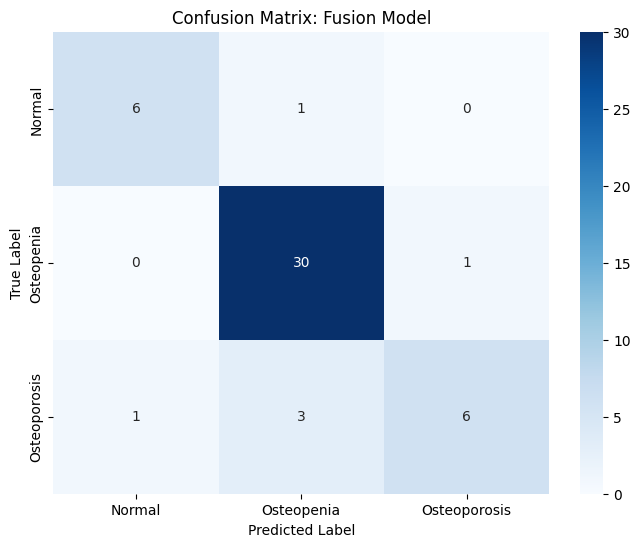

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix():
    print("Loading saved model for evaluation...")
    
    # 1. Re-create the Data Loaders (Validation Set)
    df, feature_cols, class_map = preprocess_dataframe(CONFIG['CSV_PATH'])
    _, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
    
    transforms_val = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    val_dataset = MultimodalDataset(val_df, feature_cols, CONFIG['IMAGE_ROOT_DIR'], transform=transforms_val)
    val_loader = DataLoader(val_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=False)
    
    # 2. Load the Model Structure
    model = OsteoFusionModel(
        pretrained_path=CONFIG['PRETRAINED_PATH'],
        num_tabular_features=len(feature_cols),
        num_classes=3
    ).to(CONFIG['DEVICE'])
    
    # 3. Load the Best Weights you just trained
    model.load_state_dict(torch.load("best_fusion_model.pth"))
    model.eval()
    
    # 4. Get Predictions
    y_true = []
    y_pred = []
    
    print("Running inference...")
    with torch.no_grad():
        for images, tabs, labels in val_loader:
            images = images.to(CONFIG['DEVICE'])
            tabs = tabs.to(CONFIG['DEVICE'])
            labels = labels.to(CONFIG['DEVICE'])
            
            outputs = model(images, tabs)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            
    # 5. Plot Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    class_names = ['Normal', 'Osteopenia', 'Osteoporosis']
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    
    plt.title('Confusion Matrix: Fusion Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Run it
if __name__ == "__main__":
    generate_confusion_matrix()

In [13]:
!pip install torchviz torchinfo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

Loading weights from /kaggle/input/osteoporosis-detector/pytorch/default/1/best_osteoporosis_model.pth...
✓ Model diagram saved as 'osteoporosis_fusion_architecture.png'


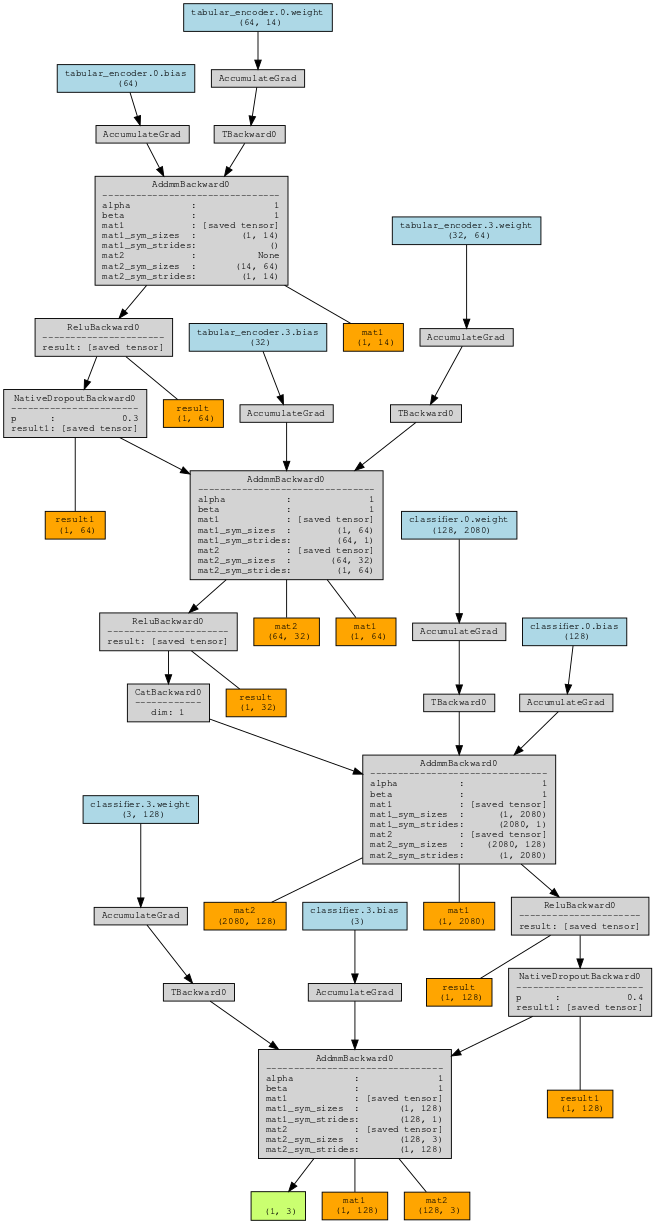

In [15]:
import torch
from torchviz import make_dot
from torchinfo import summary

# 1. Initialize the model
model = OsteoFusionModel(
    pretrained_path=CONFIG['PRETRAINED_PATH'],
    num_tabular_features=14,  # You had 14 features in your log
    num_classes=3
).to(CONFIG['DEVICE'])

# 2. Create Dummy Inputs (Fake Data)
# Batch size 1, 3 channels, 224x224 image
dummy_image = torch.randn(1, 3, 224, 224).to(CONFIG['DEVICE'])
# Batch size 1, 14 tabular features
dummy_tabular = torch.randn(1, 14).to(CONFIG['DEVICE'])

# 3. Pass data through model to build the graph
output = model(dummy_image, dummy_tabular)

# 4. Generate the Diagram
dot = make_dot(output, params=dict(model.named_parameters()), 
               show_attrs=True, 
               show_saved=True)

# Set format to PNG and save
dot.format = 'png'
dot.render("osteoporosis_fusion_architecture")

print("✓ Model diagram saved as 'osteoporosis_fusion_architecture.png'")

# Display image directly in notebook
from IPython.display import Image
Image("osteoporosis_fusion_architecture.png")

In [16]:
# Print a professional summary table
# This shows input size -> output size for each layer
summary(model, 
        input_data=[dummy_image, dummy_tabular], 
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
OsteoFusionModel (OsteoFusionModel)           [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (image_encoder)                  [1, 3, 224, 224]     [1, 2048, 1, 1]      --                   False
│    └─Conv2d (0)                             [1, 3, 224, 224]     [1, 64, 112, 112]    (9,408)              False
│    └─BatchNorm2d (1)                        [1, 64, 112, 112]    [1, 64, 112, 112]    (128)                False
│    └─ReLU (2)                               [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --
│    └─MaxPool2d (3)                          [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
│    └─Sequential (4)                         [1, 64, 56, 56]      [1, 256, 56, 56]     --                   False
│    │    └─Bottleneck (0)                    [1, 64, 56, 56]      [1, 256, 56, 

In [17]:
# Run this in your notebook to generate a professional .png file
from graphviz import Digraph

def create_diagram():
    dot = Digraph(comment='Fusion Model', format='png')
    dot.attr(rankdir='TB', dpi='300') # High DPI for report quality

    # Nodes
    dot.node('IMG_IN', 'Input Image\n(N, 3, 224, 224)', shape='box', style='filled', fillcolor='lightblue')
    dot.node('TAB_IN', 'Input Tabular\n(N, 14)', shape='box', style='filled', fillcolor='lightgreen')
    
    dot.node('RESNET', 'ResNet50 Backbone\n(Frozen Layers)', shape='component', style='dashed')
    dot.node('TAB_MLP', 'Tabular Encoder\n(Linear 14->64->32)', shape='box')
    
    dot.node('IMG_VEC', 'Image Features\n(2048)', shape='ellipse')
    dot.node('TAB_VEC', 'Tabular Features\n(32)', shape='ellipse')
    
    dot.node('CONCAT', 'CONCATENATION\n(Fusion)', shape='diamond', style='filled', fillcolor='orange')
    
    dot.node('FUSED', 'Fused Vector\n(2080)', shape='box')
    dot.node('CLASS', 'Classifier Head\n(Linear 2080->128->3)', shape='box', style='filled', fillcolor='lightgrey')
    dot.node('OUT', 'Output\n(Normal, Osteopenia, Osteoporosis)', shape='doublecircle')

    # Edges
    dot.edge('IMG_IN', 'RESNET')
    dot.edge('RESNET', 'IMG_VEC')
    
    dot.edge('TAB_IN', 'TAB_MLP')
    dot.edge('TAB_MLP', 'TAB_VEC')
    
    dot.edge('IMG_VEC', 'CONCAT')
    dot.edge('TAB_VEC', 'CONCAT')
    
    dot.edge('CONCAT', 'FUSED')
    dot.edge('FUSED', 'CLASS')
    dot.edge('CLASS', 'OUT')

    # Render
    dot.render('fusion_diagram', view=False)
    print("Diagram saved as fusion_diagram.png")

try:
    create_diagram()
except Exception as e:
    print("Graphviz not installed. You can install it with: !pip install graphviz")

Diagram saved as fusion_diagram.png
